In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [5]:
np.random.seed(42) 
_PATH_IN = "6-7_Data"
_PATH_OUT = "6-7_Output"

# Regression Algorithms

Data: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code

In [20]:
df = pd.read_csv(f"{_PATH_IN}/complete.csv")

# Exploration

In [21]:
df.head(20)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60       RL         65.0     8450   Pave   NaN      Reg   
1           20       RL         80.0     9600   Pave   NaN      Reg   
2           60       RL         68.0    11250   Pave   NaN      IR1   
3           70       RL         60.0     9550   Pave   NaN      IR1   
4           60       RL         84.0    14260   Pave   NaN      IR1   
5           50       RL         85.0    14115   Pave   NaN      IR1   
6           20       RL         75.0    10084   Pave   NaN      Reg   
7           60       RL          NaN    10382   Pave   NaN      IR1   
8           50       RM         51.0     6120   Pave   NaN      Reg   
9          190       RL         50.0     7420   Pave   NaN      Reg   
10          20       RL         70.0    11200   Pave   NaN      Reg   
11          60       RL         85.0    11924   Pave   NaN      IR1   
12          20       RL          NaN    12968   Pave   NaN      IR2   
13          20       RL         91.0    10652   Pave   NaN      IR1   
14          20       RL          NaN    10920   Pave   NaN      IR1   
15          45       RM         51.0     6120   Pave   NaN      Reg   
16          20       RL          NaN    11241   Pave   NaN      IR1   
17          90       RL         72.0    10791   Pave   NaN      Reg   
18          20       RL         66.0    13695   Pave   NaN      Reg   
19          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1          Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3          Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4          Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
5          Lvl    AllPub    Inside  ...        0    NaN  MnPrv        Shed   
6          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
7          Lvl    AllPub    Corner  ...        0    NaN    NaN        Shed   
8          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
9          Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
10         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
11         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
12         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
13         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
14         Lvl    AllPub    Corner  ...        0    NaN   GdWo         NaN   
15         Lvl    AllPub    Corner  ...        0    NaN  GdPrv         NaN   
16         Lvl    AllPub   CulDSac  ...        0    NaN    NaN        Shed   
17         Lvl    AllPub    Inside  ...        0    NaN    NaN        Shed   
18         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
19         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0        0      2    2008        WD         Normal   208500.0  
1        0      5    2007        WD         Normal   181500.0  
2        0      9    2008        WD         Normal   223500.0  
3        0      2    2006        WD        Abnorml   140000.0  
4        0     12    2008        WD         Normal   250000.0  
5      700     10    2009        WD         Normal   143000.0  
6        0      8    2007        WD         Normal   307000.0  
7      350     11    2009        WD         Normal   200000.0  
8        0      4    2008        WD        Abnorml   129900.0  
9        0      1    2008        WD         Normal   118000.0  
10       0      2    2008        WD         Normal   129500.0  
11       0      7    2006       New        Partial   345000.0  
12       0      9    2008        WD      

In [24]:
# Preprocessing function
def preprocess(df):
    df = df.copy() # Make copy so we don't ruin the original dataframe
    df = df.drop(columns=["Id"], errors='ignore') # Drop Id column
    
    numeric_cols = df.select_dtypes(np.number).columns # Numerical column name
    numeric_cols = numeric_cols.drop("SalePrice", errors='ignore') # Drop label
    categorical_cols =  df.select_dtypes(include=['object']).columns # Categorical column name
    
    df_categorical = pd.get_dummies(df[categorical_cols], dummy_na=True) # OneHotEncoding, dummy_na create another column to indicate if the cell contain NA
    
    df_numerical = df[numeric_cols].apply(lambda x: (x - x.mean()) / (x.std())) # Normalize every numerical column
    df_numerical = df_numerical.fillna(0) # Fill in missing value with mean 0
    
    df = pd.concat([df_numerical, df_categorical], axis=1) # Bind numerical column and categorical column
    
    return df

preprocessed_df = preprocess(df)
preprocessed_df.to_csv('preprocessed_house_sales_data.csv')

In [25]:
preprocessed_df.head(20)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0     0.067320    -0.184443 -0.217841     0.646073    -0.507197   1.046078   
1    -0.873466     0.458096 -0.072032    -0.063174     2.187904   0.154737   
2     0.067320    -0.055935  0.137173     0.646073    -0.507197   0.980053   
3     0.302516    -0.398622 -0.078371     0.646073    -0.507197  -1.859033   
4     0.067320     0.629439  0.518814     1.355319    -0.507197   0.947040   
5    -0.167877     0.672275  0.500430    -0.772420    -0.507197   0.715952   
6    -0.873466     0.243916 -0.010665     1.355319    -0.507197   1.079091   
7     0.067320     0.000000  0.027119     0.646073     0.391170   0.055700   
8    -0.167877    -0.784145 -0.513264     0.646073    -0.507197  -1.330831   
9     3.124875    -0.826981 -0.348436    -0.772420     0.391170  -1.066730   
10   -0.873466     0.029737  0.130834    -0.772420    -0.507197  -0.208401   
11    0.067320     0.672275  0.222630     2.064566    -0.507197   1.112104   
12   -0.873466     0.000000  0.355000    -0.772420     0.391170  -0.307439   
13   -0.873466     0.929291  0.061352     0.646073    -0.507197   1.145116   
14   -0.873466     0.000000  0.095332    -0.063174    -0.507197  -0.373465   
15   -0.285475    -0.784145 -0.513264     0.646073     2.187904  -1.396856   
16   -0.873466     0.000000  0.136032    -0.063174     1.289537  -0.043338   
17    0.772910     0.115409  0.078976    -1.481667    -0.507197  -0.142376   
18   -0.873466    -0.141607  0.447177    -0.772420    -0.507197   1.079091   
19   -0.873466     0.029737 -0.330685    -0.772420     0.391170  -0.439490   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_Oth  \
0       0.896679    0.523038    0.580708   -0.293030  ...             0   
1      -0.395536   -0.569893    1.177709   -0.293030  ...             0   
2       0.848819    0.333448    0.097840   -0.293030  ...             0   
3      -0.682695   -0.569893   -0.494771   -0.293030  ...             0   
4       0.753100    1.381770    0.468770   -0.293030  ...             0   
5       0.513801   -0.569893    0.637774   -0.293030  ...             0   
6       0.992399    0.467277    2.035897   -0.293030  ...             0   
7      -0.539116    0.768390    0.916521   -0.103911  ...             0   
8      -1.639892   -0.569893   -0.968860   -0.293030  ...             0   
9      -1.639892   -0.569893    0.898962   -0.293030  ...             0   
10     -0.921995   -0.569893    1.019679   -0.293030  ...             0   
11      1.040259    1.024894    1.221606   -0.293030  ...             0   
12     -1.065574   -0.569893    0.648748   -0.293030  ...             0   
13      1.088119    1.136418   -0.968860   -0.293030  ...             0   
14     -1.161294    0.612257    0.639969   -0.293030  ...             0   
15      0.800960   -0.569893   -0.968860   -0.293030  ...             0   
16     -0.682695    0.433819    0.299766   -0.293030  ...             0   
17     -0.826275   -0.569893   -0.968860   -0.293030  ...             0   
18      0.944539   -0.569893    0.449016   -0.293030  ...             0   
19     -0.921995   -0.569893    0.137347   -0.293030  ...             0   

    SaleType_WD  SaleType_nan  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             1             0                      0                      0   
1             1             0                      0                      0   
2             1             0                      0                      0   
3             1             0                      1                      0   
4             1             0                      0                      0   
5             1             0                      0                      0   
6             1             0                      0                      0   
7             1             0                      0                      0   
8             1             0                      1                      0   

In [40]:
numeric_cols = preprocessed_df.select_dtypes(np.number).columns # Numerical column name
#numeric_cols = numeric_cols.drop("SalePrice", errors='ignore') # Drop label
categorical_cols =  preprocessed_df.select_dtypes(include=['object']).columns # Categorical column name

for numerical in numeric_cols:
    print(f"{numerical}:")
    print(f"\t Mean              : {'{0:.2g}'.format(preprocessed_df[numerical].mean())}")
    print(f"\t Median            : {'{0:.2g}'.format(preprocessed_df[numerical].median())}")
    print(f"\t Standard Deviation: {'{0:.2g}'.format(preprocessed_df[numerical].std())}")
    print(f"\t Min               : {'{0:.2g}'.format(preprocessed_df[numerical].min())}")
    print(f"\t Max               : {'{0:.2g}'.format(preprocessed_df[numerical].max())}")
    #print(df[numerical].value_counts())
    print()

MSSubClass:
	 Mean              : 2.5e-16
	 Median            : -0.17
	 Standard Deviation: 1
	 Min               : -0.87
	 Max               : 3.1

LotFrontage:
	 Mean              : -1.7e-16
	 Median            : 0
	 Standard Deviation: 0.91
	 Min               : -2.1
	 Max               : 10

LotArea:
	 Mean              : 8e-17
	 Median            : -0.091
	 Standard Deviation: 1
	 Min               : -1.1
	 Max               : 26

OverallQual:
	 Mean              : 5.7e-17
	 Median            : -0.063
	 Standard Deviation: 1
	 Min               : -3.6
	 Max               : 2.8

OverallCond:
	 Mean              : 1.3e-16
	 Median            : -0.51
	 Standard Deviation: 1
	 Min               : -4.1
	 Max               : 3.1

YearBuilt:
	 Mean              : -5.8e-16
	 Median            : 0.056
	 Standard Deviation: 1
	 Min               : -3.3
	 Max               : 1.3

YearRemodAdd:
	 Mean              : 7.8e-16
	 Median            : 0.42
	 Standard Deviation: 1
	 Min             

In [39]:
for numerical in numeric_cols:
    print(f"{'{0:.2g}'.format(df[numerical].max())}")

1.9e+02
3.1e+02
2.2e+05
10
9
2e+03
2e+03
1.6e+03
5.6e+03
1.5e+03
2.3e+03
6.1e+03
5.1e+03
2.1e+03
1.1e+03
5.6e+03
3
2
4
2
8
3
15
4
2.2e+03
5
1.5e+03
1.4e+03
7.4e+02
1e+03
5.1e+02
5.8e+02
8e+02
1.7e+04
12
2e+03
7.6e+05


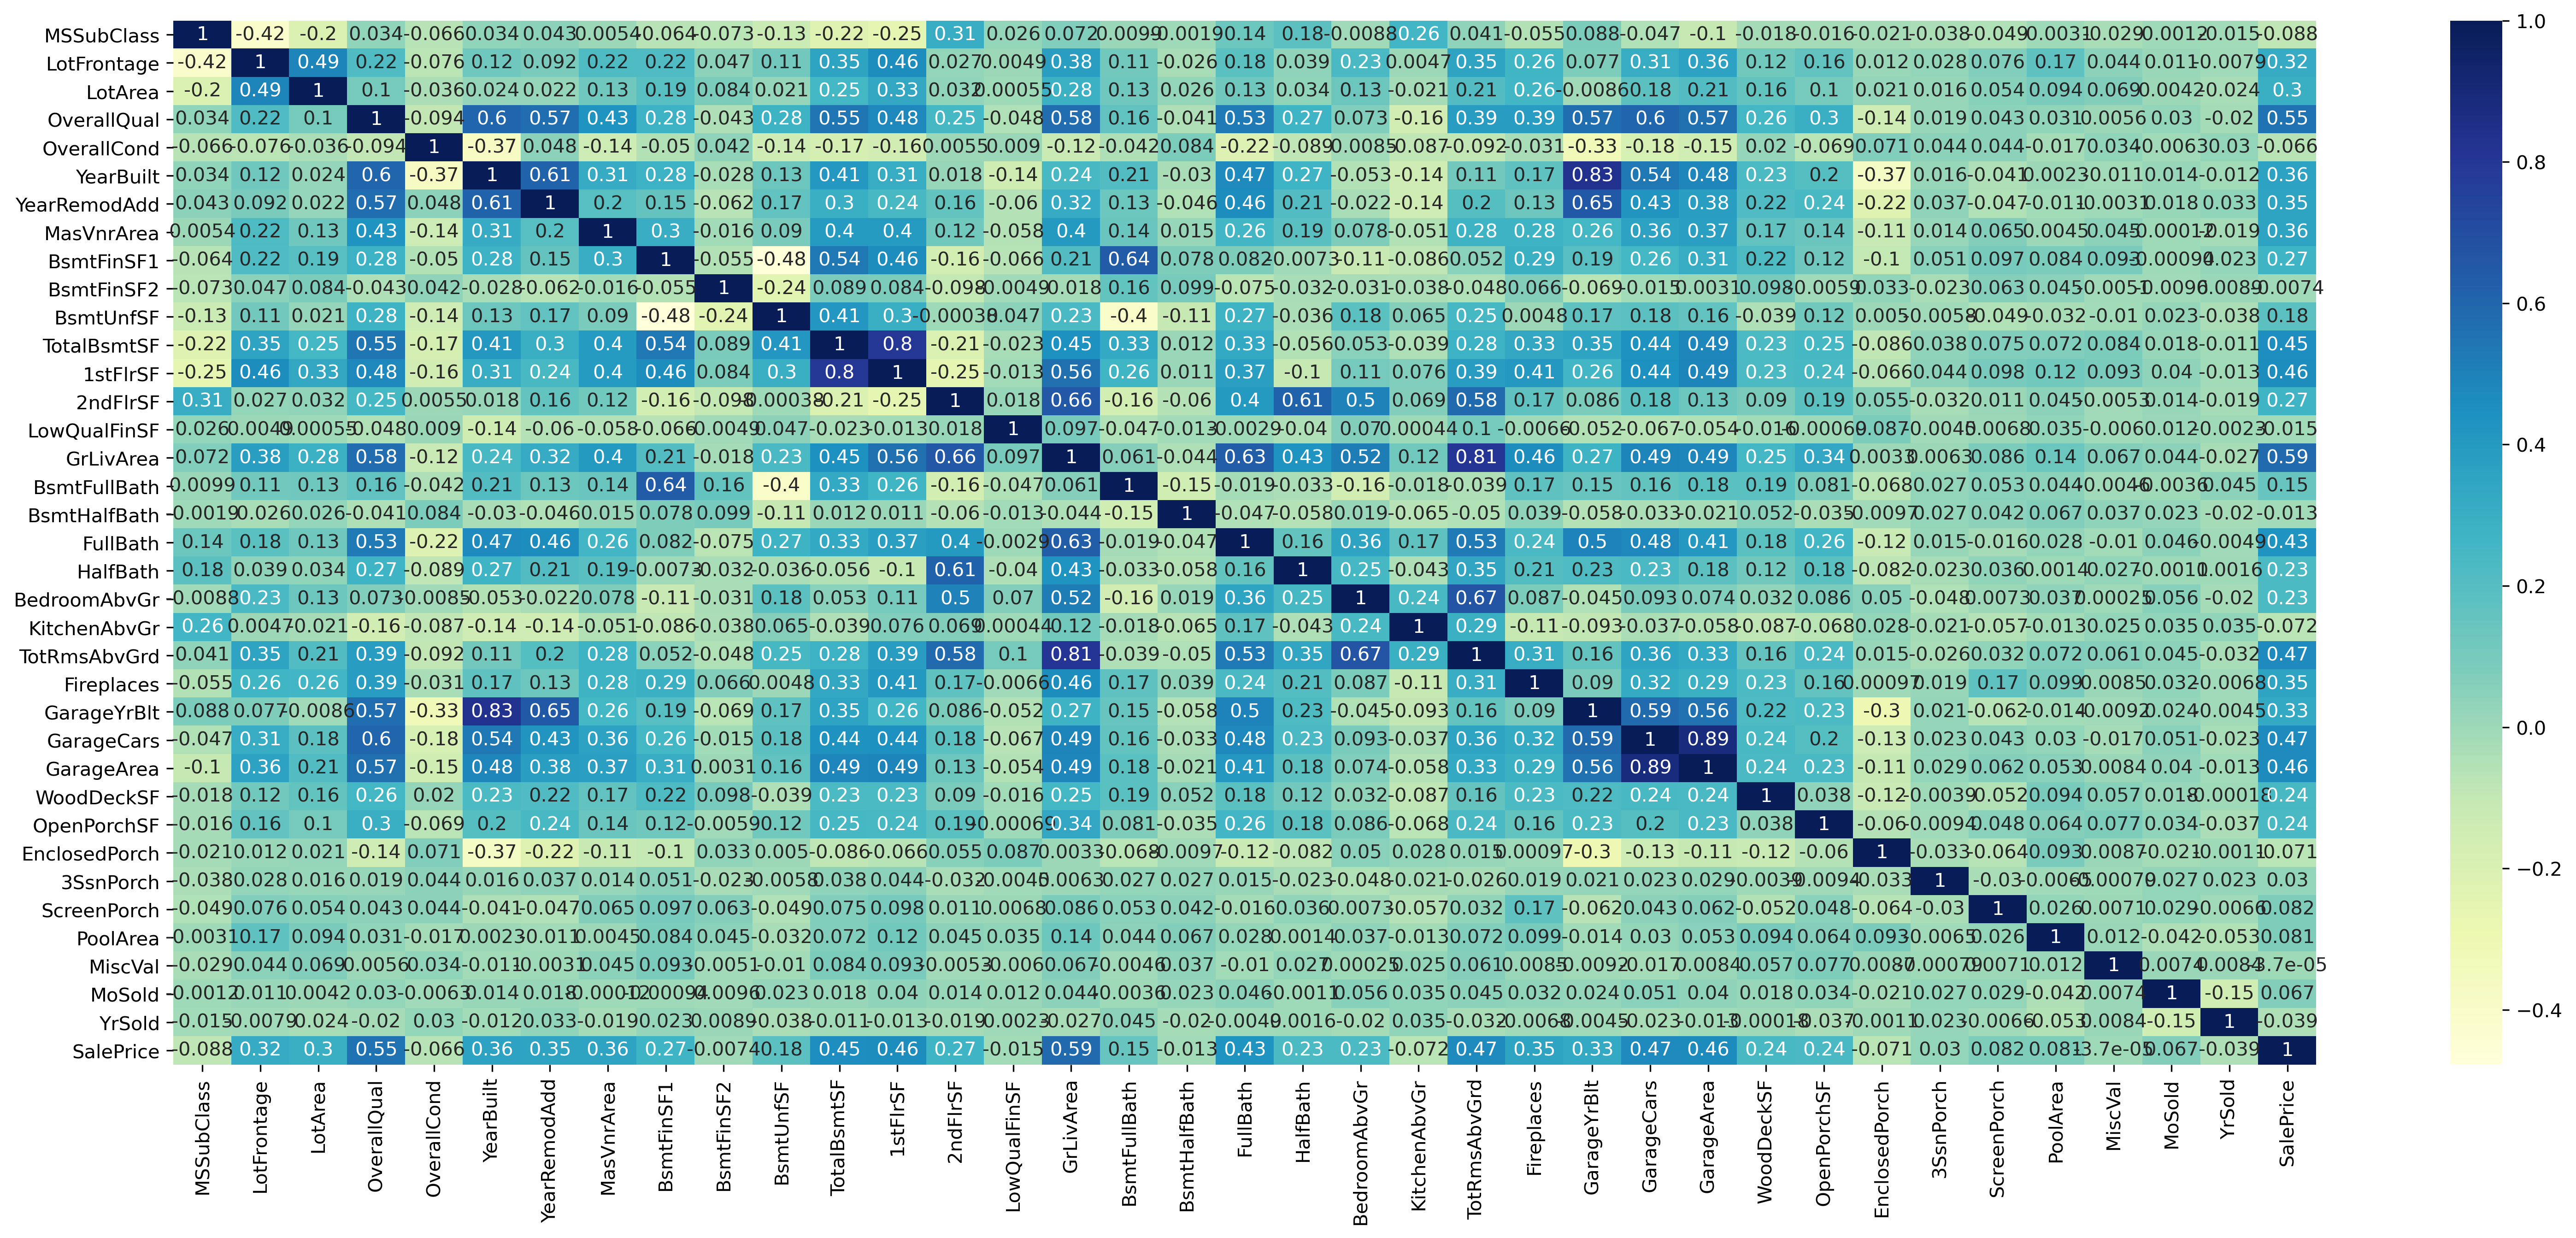

In [41]:
plt.figure(figsize=(25,10))
plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
fig = plot.get_figure()
fig.savefig(f"{_PATH_OUT}/HeatMap.png") 

# Separation des donnees

In [58]:
X = preprocessed_df
y = df["SalePrice"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1, random_state=1)

print("Selected Ratio: 10%")
print("Total Training Set: ", len(X_train))
#print("Count Training Set: ")
#print(y_train.value_counts())
print("Total Test Set: ", len(X_test))
#print("Count Test Set: ")
#print(y_test.value_counts())

Selected Ratio: 10%
Total Training Set:  2627
Total Test Set:  292


In [67]:
label_att = y_train
label_att_test = y_test
regular_att = X_train
regular_att_test = X_test

In [217]:
k_folds = sklearn.model_selection.KFold(n_splits = 5)

def _evaluate(model, X, y):
    values = sklearn.model_selection.cross_val_score(model, X, y, cv = k_folds, scoring="neg_mean_squared_log_error") #r2
    #print("All  : ", values)
    print("Eval : ", values.mean())

## Regression Tree

In [173]:
indexes =  ["friedman_mse", "poisson"]
for i in indexes:
    regressor = sklearn.tree.DecisionTreeRegressor(
        max_depth=7,
        min_samples_split = 27,
        criterion = "friedman_mse"
    )
    regressor.fit(regular_att, label_att)
    prediction = regressor.predict(regular_att_test)
    _evaluate(regressor, regular_att, label_att)

'''plt.figure()
plt.scatter(regular_att_test["MSSubClass"], label_att_test, s=120, edgecolor="#9abd6f", c="#cee6a2", label="data")
#plt.scatter(regular_att_test, prediction, s=80, edgecolor="#ca8a04", color="#facc15", label="max_depth=3", linewidth=2)
plt.show()'''
print()

Eval :  -0.053851507841191984
Eval :  -0.05338615517770916



In [186]:
_evaluate(regressor, regular_att_test, label_att_test)

Eval :  0.4636643717376085


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)

regular_att = np.hstack((regular_att,scaler.fit_transform(regular_att)))
regular_att_test = np.hstack((regular_att_test,scaler.fit_transform(regular_att_test)))

## Linear Model

In [ ]:
indexes =  range(1, 1000, 100)
for i in indexes:
  regressor = sklearn.linear_model.LinearRegression(
    fit_intercept = True,
    n_jobs = i,
    positive = False
  )
  regressor.fit(regular_att, label_att)
  prediction = regressor.predict(regular_att_test)
  _evaluate(regressor, regular_att, label_att)


'''print(f"MSE = {mean_squared_error(label_att_test, prediction, squared=True)}")
print(f"R^2  = {r2_score(label_att_test, prediction)}")
print(f"Adj R^2 = {(1-(1-r2_score(label_att_test, prediction))*(len(prediction)-1)/(len(prediction)-7-1))}")'''

In [ ]:
regressor = sklearn.linear_model.Lasso(
    alpha=0.1
    )
regressor.fit(regular_att, label_att)
prediction = regressor.predict(regular_att_test)
_evaluate(regressor, regular_att, label_att)

In [176]:
regressor = sklearn.linear_model.Ridge(
    alpha=481
)
regressor.fit(regular_att, label_att)
prediction = regressor.predict(regular_att_test)
_evaluate(regressor, regular_att, label_att)

Eval :  -0.0441221157714779


In [178]:
_evaluate(regressor, regular_att_test, label_att_test)

Eval :  -0.04448248148941632


## Random Forest

In [193]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(
    n_estimators=90,
)
regressor.fit(regular_att, label_att)
prediction = regressor.predict(regular_att_test)
_evaluate(regressor, regular_att, label_att)

Eval :  -0.04533283002629322


In [196]:
_evaluate(regressor, regular_att_test, label_att_test)

Eval :  0.4476106996727955


## Stacking

In [218]:
from sklearn.ensemble import StackingRegressor


#["constant", "optimal", "invscaling", "adaptive"]
# max_depth entre 2 et 5 
# sklearn.ensemble

regressor = StackingRegressor(
    estimators=[
    (
        'Ridge',
        sklearn.linear_model.Ridge(
            alpha=481
        )
    ),
    (
        'RandomForest',
        sklearn.ensemble.RandomForestRegressor(
            n_estimators=90,
        )
    ),
        (
        'SGD',
        sklearn.linear_model.SGDRegressor(
            learning_rate="constant"
        )
    )
    ],
    final_estimator=sklearn.tree.DecisionTreeRegressor(max_depth=3)
    )

regressor.fit(regular_att, label_att)
prediction = regressor.predict(regular_att_test)
_evaluate(regressor, regular_att, label_att)


Eval :  -0.0463168768138338


In [219]:
_evaluate(regressor, regular_att_test, label_att_test)

Eval :  -0.05481575240586746
